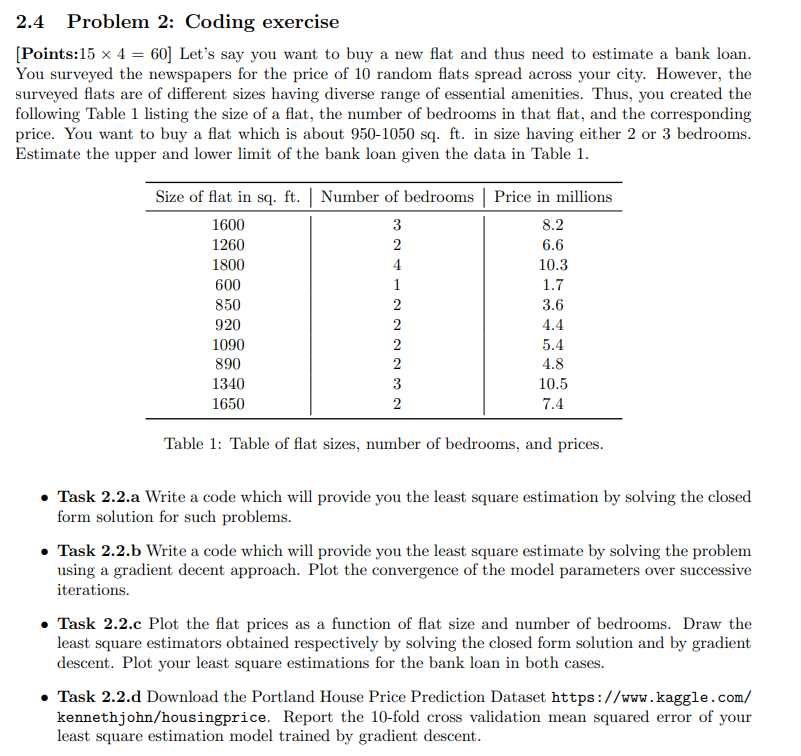

**Question 1**

In [2]:
Size_Of_Flat_In_Sq_Feet=[1600,1260,1800,600,850,920,1090,890,1340,1650]
Number_of_Bedrooms=[3,2,4,1,2,2,2,2,3,2]
Price_In_Millions=[8.2,6.6,10.3,1.7,3.6,4.4,5.4,4.8,10.5,7.4]


In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [8]:
x=list(zip(Size_Of_Flat_In_Sq_Feet,Number_of_Bedrooms))
print(x)

[(1600, 3), (1260, 2), (1800, 4), (600, 1), (850, 2), (920, 2), (1090, 2), (890, 2), (1340, 3), (1650, 2)]


In [9]:
y=Price_In_Millions

In [10]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [11]:
reg.intercept_

-1.9252501046064916

In [13]:
reg.coef_

array([0.00362953, 1.67818099])

In [41]:
import numpy as np

x,y=np.linspace(1500,2000,100),[np.random.randint(1,5) for i in range(100)]
x_surf,y_surf=np.meshgrid(x,y) #Row Repeat,Column Repeat Create a Grid
z_surf=reg.predict(np.c_[x_surf.ravel(),y_surf.ravel()]).reshape(x_surf.shape)

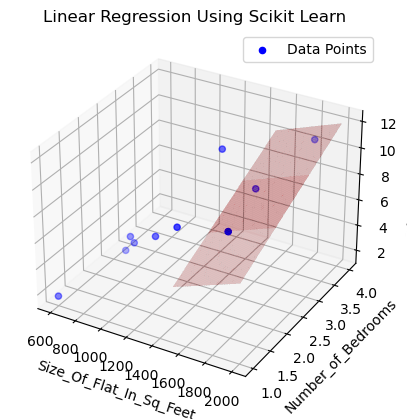

In [50]:
fig=plt.figure()
axes=fig.add_subplot(111,projection='3d')
axes.scatter(Size_Of_Flat_In_Sq_Feet,Number_of_Bedrooms,Price_In_Millions,color='blue',label='Data Points') #Data points
axes.plot_surface(x_surf,y_surf,z_surf,color='red',alpha=0.01)
axes.set_xlabel('Size_Of_Flat_In_Sq_Feet')
axes.set_ylabel('Number_of_Bedrooms')
axes.set_zlabel('Price_In_Millions')
axes.set_title('Linear Regression Using Scikit Learn')
plt.legend()
plt.show()


**Using Linear Algebraic PseudoInverse Method**

In [55]:
Size_Of_Flat_In_Sq_Feet=np.array(Size_Of_Flat_In_Sq_Feet)
Number_of_Bedrooms=np.array(Number_of_Bedrooms)
one=np.ones(Number_of_Bedrooms.shape)
x=np.c_[Size_Of_Flat_In_Sq_Feet,Number_of_Bedrooms,one]
y=np.array(Price_In_Millions)

In [59]:
np.linalg.inv(np.matmul(np.transpose(x),x))

array([[ 1.93363511e-06, -7.41755107e-04, -6.14325383e-04],
       [-7.41755107e-04,  4.48476549e-01, -1.41389935e-01],
       [-6.14325383e-04, -1.41389935e-01,  1.16238731e+00]])

In [60]:
np.matmul(np.transpose(x),y)

array([8.4542e+04, 1.6340e+02, 6.2900e+01])

In [63]:
params=np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)),np.matmul(np.transpose(x),y))
print(params)

[ 0.00362953  1.67818099 -1.9252501 ]


In [71]:
#Generate the predicted output
Predicted=np.matmul(x,params)
print(Predicted)

[ 8.91653797  6.0043174  11.3206246   1.9306478   4.51621084  4.77027781
  5.3872976   4.66139196  7.97286064  7.41983339]


**Compute The Metrics**

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f'Mean Absolute Error:',mean_absolute_error(y,Predicted))
print(f'Mean Squared Error:',mean_squared_error(y,Predicted))
print(f'R2 Score:',r2_score(y,Predicted))

Mean Absolute Error: 0.6548264800233397
Mean Squared Error: 0.9345885604879101
R2 Score: 0.8731367928860294


**Plot The Data**

In [87]:
x_surf=Size_Of_Flat_In_Sq_Feet[:9].reshape(3,3)
y_surf=Number_of_Bedrooms[:9].reshape(3,3)
z_surf=Predicted[:9].reshape(3,3)

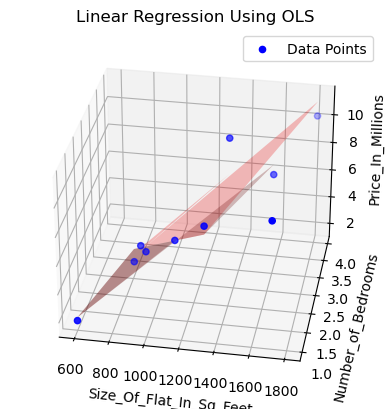

In [118]:
fig=plt.figure()
axes=fig.add_subplot(111,projection='3d')
axes.scatter(Size_Of_Flat_In_Sq_Feet,Number_of_Bedrooms,Price_In_Millions,color='blue',label='Data Points') #Data points
axes.plot_surface(x_surf,y_surf,z_surf,color='red',alpha=0.25)
axes.set_xlabel('Size_Of_Flat_In_Sq_Feet')
axes.set_ylabel('Number_of_Bedrooms')
axes.set_zlabel('Price_In_Millions')
axes.set_title('Linear Regression Using OLS')
plt.legend()
axes.view_init(elev=30, azim=280)  # Change elevation and azimuthal angle
plt.show()

**Using Gradient Descent**

In [65]:
Size_Of_Flat_In_Sq_Feet=[1600,1260,1800,600,850,920,1090,890,1340,1650]
Number_of_Bedrooms=[3,2,4,1,2,2,2,2,3,2]
Price_In_Millions=[8.2,6.6,10.3,1.7,3.6,4.4,5.4,4.8,10.5,7.4]

In [66]:
import numpy as np
Size_Of_Flat_In_Sq_Feet=np.array(Size_Of_Flat_In_Sq_Feet)
Number_of_Bedrooms=np.array(Number_of_Bedrooms)
Price_In_Millions=np.array(Price_In_Millions)

In [67]:
Size_Of_Flat_In_Sq_Feet=(Size_Of_Flat_In_Sq_Feet-np.mean(Size_Of_Flat_In_Sq_Feet))/np.std(Size_Of_Flat_In_Sq_Feet)
Number_of_Bedrooms=(Number_of_Bedrooms-np.mean(Number_of_Bedrooms))/np.std(Number_of_Bedrooms)
Price_In_Millions=(Price_In_Millions-np.mean(Price_In_Millions))/np.std(Price_In_Millions)

In [77]:
theta_2,theta_1,theta_0=0,0,0
alpha=0.1
iteration=0
loss_track,theta=[],[]

In [78]:
while(iteration<10000):
    loss=0
    grad2,grad1,grad0=0,0,0
    for i in range(len(Size_Of_Flat_In_Sq_Feet)):
        grad2+=((theta_2*Size_Of_Flat_In_Sq_Feet[i]+theta_1*Number_of_Bedrooms[i]+theta_0)-Price_In_Millions[i])*Size_Of_Flat_In_Sq_Feet[i]
        grad1+=((theta_2*Size_Of_Flat_In_Sq_Feet[i]+theta_1*Number_of_Bedrooms[i]+theta_0)-Price_In_Millions[i])*Number_of_Bedrooms[i]
        grad0+=((theta_2*Size_Of_Flat_In_Sq_Feet[i]+theta_1*Number_of_Bedrooms[i]+theta_0)-Price_In_Millions[i])
    temp2=theta_2-(alpha/len(Size_Of_Flat_In_Sq_Feet))*grad2
    temp1=theta_1-(alpha/len(Size_Of_Flat_In_Sq_Feet))*grad1
    temp0=theta_0-(alpha/len(Size_Of_Flat_In_Sq_Feet))*grad0
    theta_2=temp2
    theta_1=temp1
    theta_0=temp0
    #Compute the loss
    for i in range(len(Size_Of_Flat_In_Sq_Feet)):
        loss+=((theta_2*Size_Of_Flat_In_Sq_Feet[i]+theta_1*Number_of_Bedrooms[i]+theta_0)-Price_In_Millions[i])**2
    loss_track.append(loss)
    theta.append((theta_2,theta_1,theta_0))
    if(loss<0.01):
        break
    iteration+=1

In [79]:
print(loss_track)

[7.144688043189133, 5.223147397598649, 3.9300059167467327, 3.059757661036825, 2.4741035342049433, 2.0799725500803126, 1.814730830484386, 1.636227722045488, 1.5160971432042585, 1.4352495996273884, 1.380838451147135, 1.3442183040052886, 1.3195710724891572, 1.3029813612482688, 1.2918142264180168, 1.2842964282514004, 1.2792346271903912, 1.2758257386020815, 1.2735293074226635, 1.2719816202656606, 1.2709379055423535, 1.270233435938783, 1.2697573515895493, 1.269435043884119, 1.2692163003121044, 1.2690673263083385, 1.268965376198146, 1.2688951399858843, 1.2688463117714648, 1.2688119533658457, 1.268787393050827, 1.268769484474449, 1.2687561079065957, 1.268745834595625, 1.2687377008870626, 1.2687310562088898, 1.2687254607669012, 1.2687206166935194, 1.2687163217098842, 1.2687124379388044, 1.2687088709138812, 1.2687055554504738, 1.2687024461345675, 1.2686995109194656, 1.268696726814055, 1.2686940769787334, 1.2686915487687482, 1.268689132415203, 1.2686868201352943, 1.2686846055314767, 1.26868248318

In [80]:
len(loss_track)

10000

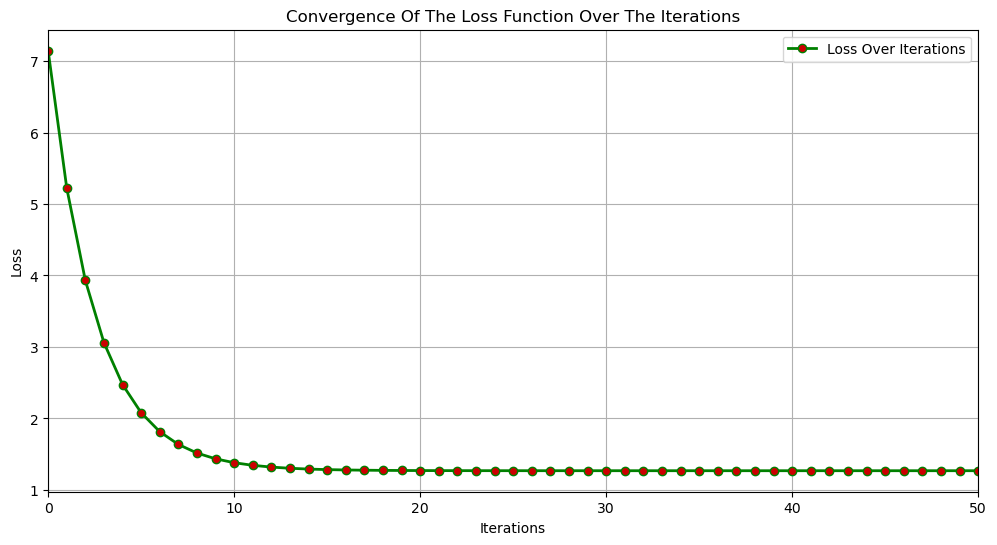

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(loss_track,label='Loss Over Iterations',linewidth=2,color='green',marker='o',markerfacecolor='#CC0000')
plt.xlim(0,50)
plt.xlabel('Iterations')
plt.ylabel("Loss")
plt.title("Convergence Of The Loss Function Over The Iterations")
plt.grid()
plt.legend()
plt.show()


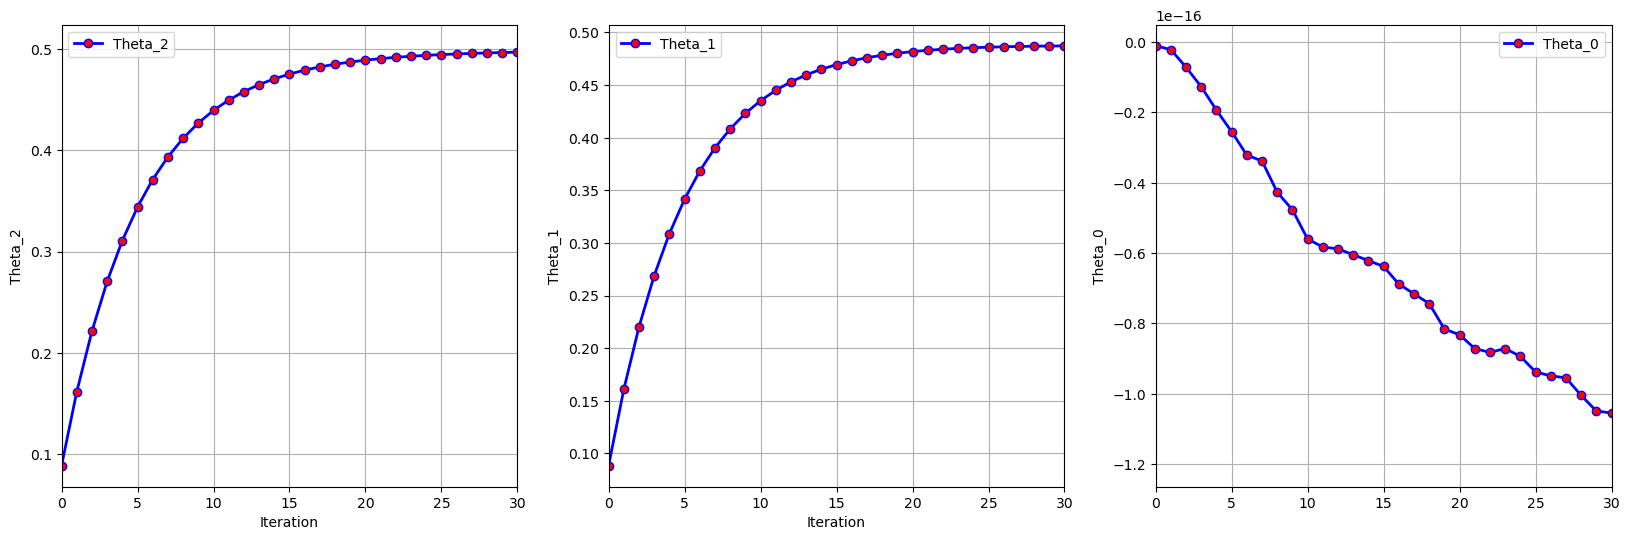

In [120]:
fig,axis=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
t2=[item[0] for item in theta]
t1=[item[1] for item in theta]
t0=[item[2] for item in theta]
axis[0].plot(t2,linewidth=2,color='blue',label="Theta_2",marker='o',markerfacecolor='red')
axis[0].set_xlim(0,30)
axis[0].set_xlabel("Iteration")
axis[0].set_ylabel("Theta_2")
axis[0].set_label("Theta_2 Variation over iterations")
axis[0].grid()
axis[0].legend()
axis[1].plot(t1,linewidth=2,color='blue',label="Theta_1",marker='o',markerfacecolor='red')
axis[1].set_xlim(0,30)
axis[1].set_xlabel("Iteration")
axis[1].set_ylabel("Theta_1")
axis[1].set_label("Theta_1 Variation over iterations")
axis[1].grid()
axis[1].legend()
axis[2].plot(t0,linewidth=2,color='blue',label="Theta_0",marker='o',markerfacecolor='red')
axis[2].set_xlim(0,30)
axis[0].set_xlabel("Iteration")
axis[2].set_ylabel("Theta_0")
axis[2].set_label("Theta_0 Variation over iterations")
axis[2].grid()
axis[2].legend()
plt.show()




**3D plot**

In [121]:
Theta2_surf=np.array(t2[:9801]).reshape(99,99)
Theta1_surf=np.array(t1[:9801]).reshape(99,99)
Loss=np.array(loss_track[:9801]).reshape(99,99)

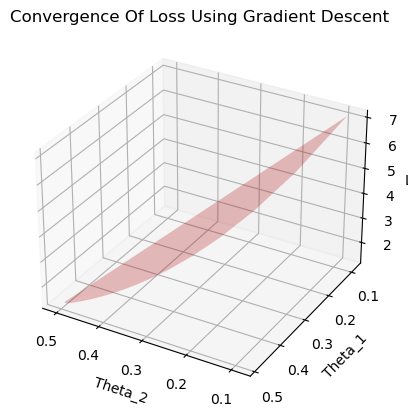

In [131]:
fig=plt.figure()
axes=fig.add_subplot(111,projection='3d')
axes.plot_surface(Theta2_surf,Theta1_surf,Loss,color='red',alpha=0.25)
axes.set_xlabel('Theta_2')
axes.set_ylabel('Theta_1')
axes.set_zlabel('Loss')
axes.set_title('Convergence Of Loss Using Gradient Descent')
axes.view_init(elev=30, azim=120)  # Change elevation and azimuthal angle
plt.show()